In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from bokeh.palettes import Dark2_5
from bokeh.palettes import Category10_10
from bokeh.layouts import row
from bokeh.io import export_png
from time import sleep
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.annotations import Label
from bokeh.plotting import figure, output_file, show
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
from bokeh.models.annotations import Span
from bokeh.models.glyphs import Text
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
output_notebook()


Loading BokehJS ...

In [2]:
neuron_data = {}

with open('../neuron_logs/train_data/output_20191013-181903.json', 'r') as f:
    neuron_data = json.load(f)

In [7]:
neuron_data.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'])

In [4]:

acc_usefulness_per_epoch = [neuron_data[e]['0 20']['usefulness_acc'] for e in neuron_data]
loss_usefulness_per_epoch = [neuron_data[e]['0 20']['usefulness_loss'] for e in neuron_data]

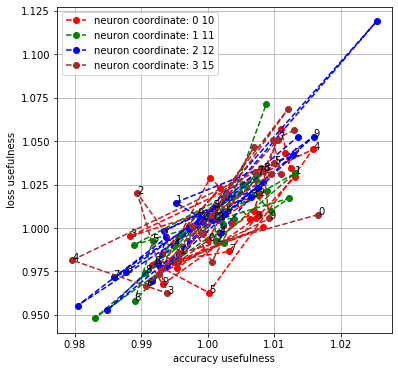

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

for i, neuron in enumerate(['0 10', '1 11', '2 12', '3 15']):
    colors = ['red', 'green', 'blue', 'brown']
    acc_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_acc'] for e in neuron_data if e != '0']
    loss_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_loss'] for e in neuron_data if e != '0']
    plt.plot(acc_usefulness_per_epoch, loss_usefulness_per_epoch, 'go--', color = colors[i], label = f"neuron coordinate: {neuron}")
    for i, x, y in zip(list(range(10)), acc_usefulness_per_epoch, loss_usefulness_per_epoch):                                       # <--
        ax.annotate(f"{i}", xy=(x, y), textcoords='data')
    z = np.polyfit(acc_usefulness_per_epoch, loss_usefulness_per_epoch, 1)
    p = np.poly1d(z)
    #plt.plot(acc_usefulness_per_epoch,p(acc_usefulness_per_epoch), color = colors[i], label = f"neuron coordinate: {neuron}")

plt.xlabel('accuracy usefulness')
plt.ylabel('loss usefulness')
plt.legend()
plt.grid()

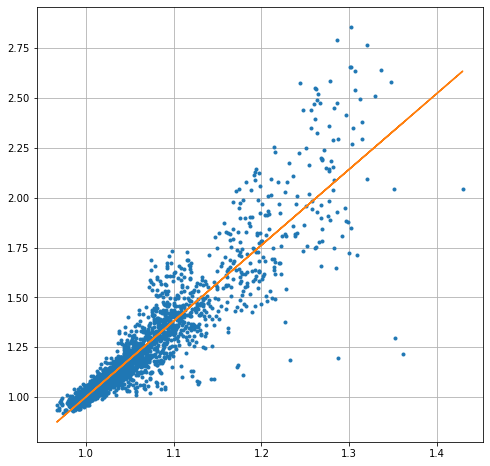

In [8]:
global_acc = [neuron_data[e][neuron]['usefulness_acc'] for neuron in neuron_data['0'] for e in neuron_data  if e != '0' and ' ' in neuron]
global_loss = [neuron_data[e][neuron]['usefulness_loss'] for neuron in neuron_data['0'] for e in neuron_data  if e != '0' and ' ' in neuron]

plt.figure(figsize=(8,8))
plt.plot(global_acc, global_loss, '.')

z = np.polyfit(global_acc, global_loss, 1)
p = np.poly1d(z)
plt.plot(global_acc,p(global_acc))
plt.grid()


In [9]:
neuron_data['1'].keys()

dict_keys(['0 0', '0 1', '0 2', '0 3', '0 4', '0 5', '0 6', '0 7', '0 8', '0 9', '0 10', '0 11', '0 12', '0 13', '0 14', '0 15', '0 16', '0 17', '0 18', '0 19', '0 20', '0 21', '0 22', '0 23', '0 24', '0 25', '0 26', '0 27', '0 28', '0 29', '1 0', '1 1', '1 2', '1 3', '1 4', '1 5', '1 6', '1 7', '1 8', '1 9', '1 10', '1 11', '1 12', '1 13', '1 14', '1 15', '1 16', '1 17', '1 18', '1 19', '1 20', '1 21', '1 22', '1 23', '1 24', '1 25', '1 26', '1 27', '1 28', '1 29', '2 0', '2 1', '2 2', '2 3', '2 4', '2 5', '2 6', '2 7', '2 8', '2 9', '2 10', '2 11', '2 12', '2 13', '2 14', '2 15', '2 16', '2 17', '2 18', '2 19', '2 20', '2 21', '2 22', '2 23', '2 24', '2 25', '2 26', '2 27', '2 28', '2 29', '3 0', '3 1', '3 2', '3 3', '3 4', '3 5', '3 6', '3 7', '3 8', '3 9', '3 10', '3 11', '3 12', '3 13', '3 14', '3 15', '3 16', '3 17', '3 18', '3 19', '3 20', '3 21', '3 22', '3 23', '3 24', '3 25', '3 26', '3 27', '3 28', '3 29', 'original_labels', 'predicted_labels'])

In [10]:


acc_usefulness_per_epoch = [neuron_data[e]['0 20']['usefulness_acc'] for e in neuron_data]
loss_usefulness_per_epoch = [neuron_data[e]['0 20']['usefulness_loss'] for e in neuron_data]


Loading BokehJS ...

In [8]:
p = figure(plot_width=600, plot_height=400, title = "Loss vs. accuracy usefulness")
neurons = [f'{d} {w}' for d in range(4) for w in range(30) if w % 4 == 0]

for i, neuron in enumerate(neurons):
    colors = ['red', 'green', 'blue', 'brown']
    fin = 5
    color = colors[int(neuron[0])]
    acc_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_acc'] for e in neuron_data if e != '0' and int(e) <= fin]
    loss_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_loss'] for e in neuron_data if e != '0' and int(e) <= fin]
    #p.circle(acc_usefulness_per_epoch, loss_usefulness_per_epoch, color = color,
    #        size = 8, fill_color = color, legend=f'layer {neuron[0]}')

    p.circle(acc_usefulness_per_epoch[-1], loss_usefulness_per_epoch[-1], size = 8, color = color, fill_color = color)
    
    for i, (x, y) in enumerate(list(zip(acc_usefulness_per_epoch, loss_usefulness_per_epoch))):
        #label = Label(x=x, y=y, x_offset=5, y_offset=-5, text=f'{i}', text_baseline="middle")
        #p.add_layout(label)

        if i != len(acc_usefulness_per_epoch)-1:
            
            
            
            x_cur, y_cur = acc_usefulness_per_epoch[i], loss_usefulness_per_epoch[i]
            x_next, y_next = acc_usefulness_per_epoch[i+1], loss_usefulness_per_epoch[i+1]
            arrow = Arrow(end=OpenHead(line_color=color, line_width=1, size = 8),
                       x_start=x_cur, y_start=y_cur, x_end=x_next, y_end=y_next,
                        line_dash = 'dashed', line_color = color, line_width = 1)
            p.add_layout(arrow)

p.xaxis.axis_label = 'accuracy usefulness'
p.yaxis.axis_label = 'loss usefulness'

show(p)

In [71]:
p = figure(plot_width=600, plot_height=400, title = "Loss vs. accuracy usefulness")
neurons = [f'{d} {w}' for d in range(4) for w in range(30) if w % 4 == 0]

for i, neuron in enumerate(neurons):
    
    if i == 2:
        break
    
    fin = 5
    color = colors[int(neuron[0])]
    acc_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_acc'] for e in neuron_data if e != '0' and int(e) <= fin]
    loss_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_loss'] for e in neuron_data if e != '0' and int(e) <= fin]
    data = dict(x = acc_usefulness_per_epoch, y = loss_usefulness_per_epoch, d = )
    #p.circle(acc_usefulness_per_epoch, loss_usefulness_per_epoch, color = color,
    #        size = 8, fill_color = color, legend=f'layer {neuron[0]}')

    p.circle(acc_usefulness_per_epoch[-1], loss_usefulness_per_epoch[-1], size = 8, color = color, fill_color = color)
    
    for i, (x, y) in enumerate(list(zip(acc_usefulness_per_epoch, loss_usefulness_per_epoch))):
        #label = Label(x=x, y=y, x_offset=5, y_offset=-5, text=f'{i}', text_baseline="middle")
        #p.add_layout(label)

        if i != len(acc_usefulness_per_epoch)-1:
            
            
            
            x_cur, y_cur = acc_usefulness_per_epoch[i], loss_usefulness_per_epoch[i]
            x_next, y_next = acc_usefulness_per_epoch[i+1], loss_usefulness_per_epoch[i+1]
            arrow = Arrow(end=OpenHead(line_color=color, line_width=1, size = 8),
                       x_start=x_cur, y_start=y_cur, x_end=x_next, y_end=y_next,
                        line_dash = 'dashed', line_color = color, line_width = 1)
            p.add_layout(arrow)

p.xaxis.axis_label = 'accuracy usefulness'
p.yaxis.axis_label = 'loss usefulness'

show(p)

SyntaxError: invalid syntax (<ipython-input-71-62c073ce352a>, line 10)

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [5]:
neuron = '3 16'
end = 25
epochs = [str(x) for x in range(end)]
images = 100
labels = neuron_data['0']['original_labels'][:100]
activations = [neuron_data[e][neuron]['activations'][:images] for e in epochs]
activations = np.array(activations)
colors = ['red', 'green', 'blue', 'brown']

s1 = figure(plot_width=600, plot_height=300, title = "Activations during training; same color means same label")


for i in range(images):
    #print(activations[:, i])
    s1.line(list(range(end)), activations[:, i], line_width=1.5, color = Category10_10[labels[i]])
    s1.circle(list(range(end)), activations[:, i], size = 2, color = Category10_10[labels[i]])
    
s1.xaxis.axis_label = 'epoch'
s1.yaxis.axis_label = 'activations for image'
middle = Span(location=0, dimension='width', line_color='black', line_width=2)
s1.add_layout(middle)




s2 = figure(plot_width=300, plot_height=300, title = "Loss vs. accuracy usefulness")
color = colors[int(neuron[0])]
acc_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_acc'] for e in neuron_data if int(e) < end]
loss_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_loss'] for e in neuron_data if int(e) < end]
#data = dict(x = acc_usefulness_per_epoch, y = loss_usefulness_per_epoch, d = )
#p.circle(acc_usefulness_per_epoch, loss_usefulness_per_epoch, color = color,
#        size = 8, fill_color = color, legend=f'layer {neuron[0]}')

s2.circle(acc_usefulness_per_epoch[0], loss_usefulness_per_epoch[0], size = 8, color = 'black', fill_color = 'black')
s2.circle(acc_usefulness_per_epoch[-1], loss_usefulness_per_epoch[-1], size = 8, color = color, fill_color = color)

for i, (x, y) in enumerate(list(zip(acc_usefulness_per_epoch, loss_usefulness_per_epoch))):
    if i != len(acc_usefulness_per_epoch)-1:

        x_cur, y_cur = acc_usefulness_per_epoch[i], loss_usefulness_per_epoch[i]
        x_next, y_next = acc_usefulness_per_epoch[i+1], loss_usefulness_per_epoch[i+1]
        arrow = Arrow(end=OpenHead(line_color=color, line_width=1, size = 8),
                   x_start=x_cur, y_start=y_cur, x_end=x_next, y_end=y_next,
                    line_dash = 'dotted', line_color = color, line_width = 1)
        s2.add_layout(arrow)

for e in range(end):
    custom_label = Label(x=e, y=-900, 
    text=f' {acc_usefulness_per_epoch[e]:.2f} \n {loss_usefulness_per_epoch[e]:.2f} ', 
            render_mode='canvas',
            text_font_size = '7pt',
            border_line_color='black', border_line_alpha=1.0,
            background_fill_color='white', background_fill_alpha=0.7, 
            angle = 90, 
            angle_units = 'deg')
    
    s1.add_layout(custom_label)

#source = ColumnDataSource(dict(x=[0], y=[-100], text=[f'{acc_usefulness_per_epoch[test_e]:.2f}\n{loss_usefulness_per_epoch[test_e]:.2f}']))

#glyph = Text(x="x", y="y", text="text", text_font_size = '10pt', )
#s1.add_glyph(source, glyph)
    
upper = Span(location=1, dimension='width', line_color='olive', line_width=1)
s2.add_layout(upper)

lower = Span(location=1, dimension='height', line_color='firebrick', line_width=1)
s2.add_layout(lower)
        
show(row([s2, s1]))

In [3]:
from bokeh.io.export import get_screenshot_as_png
width, height = 1000, 500

for neuron in [f'{d} {w}' for d in range(4) for w in range(30)]:

    end = 26
    epochs = [str(x) for x in range(end)]
    images = 100
    labels = neuron_data['0']['original_labels'][:images]
    activations = [neuron_data[e][neuron]['activations'][:images] for e in epochs]
    activations = np.array(activations)
    colors = ['red', 'green', 'blue', 'brown']

    s1 = figure(plot_width=width, plot_height=height, 
                title = "Activations during training; same color means same label",
                y_range = (-700, 700))


    for i in range(images):
        #print(activations[:, i])
        s1.line(list(range(len(epochs))), activations[:, i], line_width=1.5, color = Category10_10[labels[i]])
        s1.circle(list(range(len(epochs))), activations[:, i], size = 2, color = Category10_10[labels[i]])

    s1.xaxis.axis_label = 'epoch'
    s1.yaxis.axis_label = 'activations for image'
    middle = Span(location=0, dimension='width', line_color='black', line_width=2)
    s1.add_layout(middle)


    s2 = figure(plot_width=height, plot_height=height, title = f"Loss vs. accuracy usefulness on {neuron}", 
                x_range = (0.9, 1.5), y_range = (0.7, 3))
    color = colors[int(neuron[0])]
    acc_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_acc'] for e in neuron_data]
    loss_usefulness_per_epoch = [neuron_data[e][neuron]['usefulness_loss'] for e in neuron_data]
    #data = dict(x = acc_usefulness_per_epoch, y = loss_usefulness_per_epoch, d = )
    #p.circle(acc_usefulness_per_epoch, loss_usefulness_per_epoch, color = color,
    #        size = 8, fill_color = color, legend=f'layer {neuron[0]}')

    s2.circle(acc_usefulness_per_epoch[0], loss_usefulness_per_epoch[0], size = 8, color = 'black', fill_color = 'black')
    s2.circle(acc_usefulness_per_epoch[-1], loss_usefulness_per_epoch[-1], size = 8, color = color, fill_color = color)

    for i, (x, y) in enumerate(list(zip(acc_usefulness_per_epoch, loss_usefulness_per_epoch))):
        if i != len(acc_usefulness_per_epoch)-1:

            x_cur, y_cur = acc_usefulness_per_epoch[i], loss_usefulness_per_epoch[i]
            x_next, y_next = acc_usefulness_per_epoch[i+1], loss_usefulness_per_epoch[i+1]
            arrow = Arrow(end=OpenHead(line_color=color, line_width=1, size = 8),
                       x_start=x_cur, y_start=y_cur, x_end=x_next, y_end=y_next,
                        line_dash = 'dotted', line_color = color, line_width = 1)
            s2.add_layout(arrow)

    upper = Span(location=1, dimension='width', line_color='olive', line_width=1)
    s2.add_layout(upper)

    lower = Span(location=1, dimension='height', line_color='firebrick', line_width=1)
    s2.add_layout(lower)
    
    
    for e in range(end):
        custom_label = Label(x=e, y=-650, 
        text=f' {acc_usefulness_per_epoch[e]:.2f} \n {loss_usefulness_per_epoch[e]:.2f} ', 
                render_mode='canvas',
                text_font_size = '10pt',
                border_line_color='black', border_line_alpha=1.0,
                background_fill_color='white', background_fill_alpha=0.7, 
                angle = 90, 
                angle_units = 'deg')
        s1.add_layout(custom_label)
    
    export_png(row([s2, s1]), filename=f'fashionmnist_useful_activations/act_use_{neuron}.png')
    # show(row([s2, s1]))